# **Naive Bayes Classifier**( Assignment-Haritha P V)(14-07-2024)

# Tools

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [92]:
data =pd.read_csv("/content/sample_data/Breast_cancer_data.csv")

In [93]:
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


<Axes: >

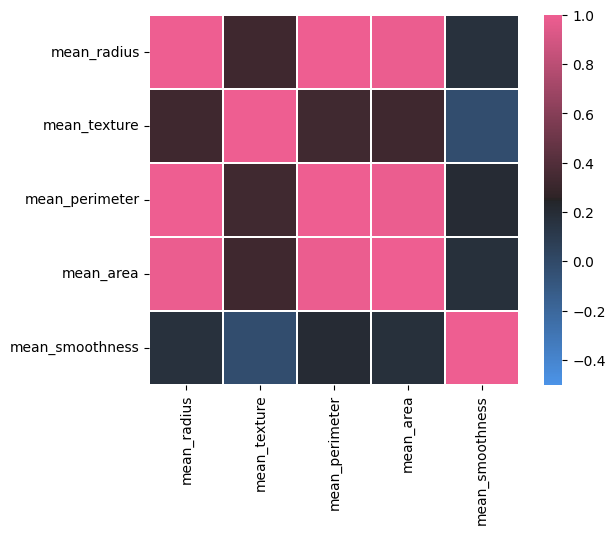

In [89]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [90]:
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


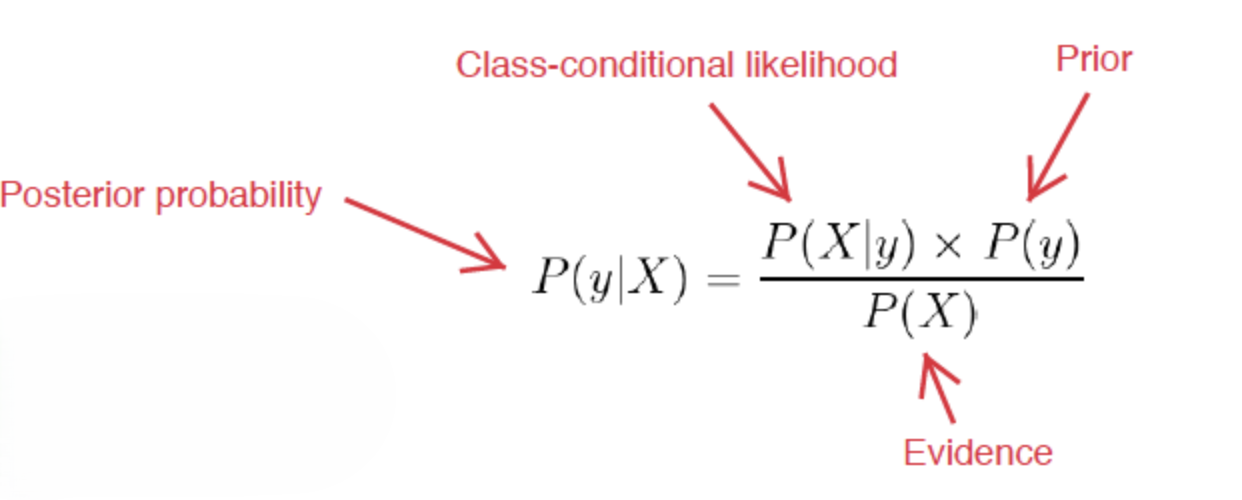

y=0,1

x=x0,x1,x2

and ignore P(x)

# Calculate P(Y=y) for all possible y(Prior probability)

In [94]:
def calculate_prior(df, Y):
   # Get a sorted list of unique classes in the target variable Y
    classes = sorted(list(df[Y].unique()))

    # Initialize an empty list to store the prior probabilities
    prior = []

    # Loop through each class to calculate its prior probability
    for i in classes:
      # Calculate the proportion of the class in the dataset
        prior.append(len(df[df[Y]==i])/len(df))

         # Return the list of prior probabilities
    return prior

In [95]:
prior = calculate_prior(data, "diagnosis")
print(prior)

[0.37258347978910367, 0.6274165202108963]


# Convert continuous features to Categorical features

In [96]:
data["catg_mean_radius"] = pd.cut(data["mean_radius"].values, bins = 3, labels = [0,1,2])
data["catg_mean_texture"] = pd.cut(data["mean_texture"].values, bins = 3, labels = [0,1,2])
data["catg_mean_smoothness"] = pd.cut(data["mean_smoothness"].values, bins = 3, labels = [0,1,2])

data = data.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])
data = data[["catg_mean_radius",	"catg_mean_texture",	"catg_mean_smoothness", "diagnosis"]]
data.head(10)

,catg_mean_radius,catg_mean_texture,catg_mean_smoothness,diagnosis
0,1,0,1,0
1,1,0,0,0
2,1,1,1,0
3,0,1,2,0
4,1,0,1,0
5,0,0,2,0
6,1,1,1,0
7,0,1,1,0
8,0,1,2,0
9,0,1,1,0


# Calculate P(X=x|Y=y) categorically(Likelihood)

In [97]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
  # Get the list of columns in the DataFrame
    feat = list(df.columns)

  # Filter the DataFrame to include only rows where the target variable Y equals the given label
    df = df[df[Y]==label]

  # Calculate the probability of the feature value given the label
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)

    return p_x_given_y

In [98]:
print(calculate_likelihood_categorical(data, "catg_mean_radius", 0, "diagnosis", 0))

0.1509433962264151


# Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum(Posterior probability)

In [99]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for idx,x in enumerate(X):
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        # Print the posterior probabilities for the first few rows
        if idx < 5:
            print(f"Posterior probabilities for sample {idx+1}: {post_prob}")

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

# Test Categorical model

In [100]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

# Separate features and target variable for test set
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values

# Predict using Naive Bayes classifier
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis")

# Print confusion matrix and F1 score
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

Posterior probabilities for sample 1: [0.0023401422806506636, 0.18138063162972953]
Posterior probabilities for sample 2: [0.009750592836044432, 0.032497363166993205]
Posterior probabilities for sample 3: [0.06639689407401685, 0.03514529646208154]
Posterior probabilities for sample 4: [0.015935254577764044, 0.19615979420696675]
Posterior probabilities for sample 5: [0.0023401422806506636, 0.18138063162972953]
[[38  2]
 [ 5 69]]
0.9517241379310345
